#

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the feature-engineered dataset
file_path = "../data/processed/CEAS_08_feature_engineered.csv"
df = pd.read_csv(file_path)

# Quick preview
print(df.head())
print("\nColumns:", df.columns.tolist())

# Encode sender_domain into numbers
le = LabelEncoder()
df['sender_domain_encoded'] = le.fit_transform(df['sender_domain'])

# Define feature matrix (X) and target vector (y)
X = df[['sender_domain_encoded', 'body_length', 'subject_length', 'urls']]
y = df['label']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          never agree to be a loser   
1  

# here we will begin to split the test and train data

In [4]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm split shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31311, 4)
X_test shape: (7828, 4)
y_train shape: (31311,)
y_test shape: (7828,)


# Tune Logistic Regression:
- Search different values of C and penalty
- 5-fold cross-validate on X_train
- Find the best settings for maximum F1-Score (because F1 matters most in phishing detection)-

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Set up GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search_logreg.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Logistic Regression hyperparameters:", grid_search_logreg.best_params_)
print("Best cross-validated F1-Score:", grid_search_logreg.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................C=0.01, penalty=l1; total time=   0.1s
[CV] END .................................C=0.01, penalty=l1; total time=   0.1s
[CV] END .................................C=0.01, penalty=l1; total time=   0.2s
[CV] END .................................C=0.01, penalty=l1; total time=   0.2s
[CV] END .................................C=0.01, penalty=l1; total time=   0.2s
[CV] END .................................C=0.01, penalty=l2; total time=   0.3s
[CV] END .................................C=0.01, penalty=l2; total time=   0.3s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.1s
[CV] END .................................C=0.01, penalty=l2; total time=   0.2s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.2s
[CV] END .................................C=0.01

## Logistic Regression Hyperparameter Tuning Summary
A Logistic Regression model was tuned using GridSearchCV to optimize its performance on phishing email detection.
The hyperparameters tuned were:

- C (Inverse regularization strength): [0.01, 0.1, 1, 10, 100]

- penalty (Regularization type): ['l1', 'l2']

The tuning process used 5-fold cross-validation, optimizing for F1-Score due to the importance of balancing precision and recall in this classification task.

Best Hyperparameters Found:

- C = 10

- penalty = 'l1'

Best Cross-Validated F1-Score: 0.758 (rounded)

These hyperparameters will be used to evaluate Logistic Regression on the independent test set.

# Tunning Decsision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid_tree = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Set up GridSearchCV
grid_search_tree = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid_tree,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search_tree.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Decision Tree hyperparameters:", grid_search_tree.best_params_)
print("Best cross-validated F1-Score:", grid_search_tree.best_score_)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples

# Decision Tree Hyperparameter Tuning Summary
A Decision Tree Classifier was tuned using GridSearchCV to optimize its performance on phishing email detection.
The hyperparameters tuned were:
- max_depth (The maximum depth of the tree): [5, 10, 20, 30, None]
- min_samples_split (Minimum samples needed to split an internal node): [2, 5, 10]
- min_samples_leaf (Minimum samples needed at a leaf node): [1, 2, 5]

The tuning process used 5-fold cross-validation, optimizing for F1-Score due to the importance of balancing precision and recall in this classification task.

Best Hyperparameters Found:
- max_depth = 10
- min_samples_leaf = 2
- min_samples_split = 5

Best Cross-Validated F1-Score: 0.931 (rounded)

These hyperparameters will be used to evaluate the Decision Tree model on the independent test set.

# Evaluate models

Logistic Regression Test Accuracy: 0.7205
Logistic Regression Test F1-Score: 0.7639

Decision Tree Test Accuracy: 0.929
Decision Tree Test F1-Score: 0.9363


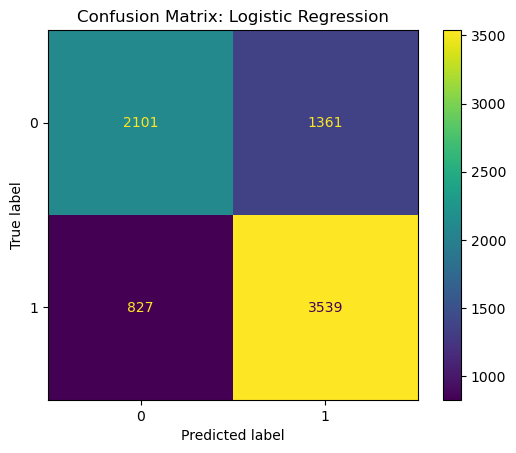

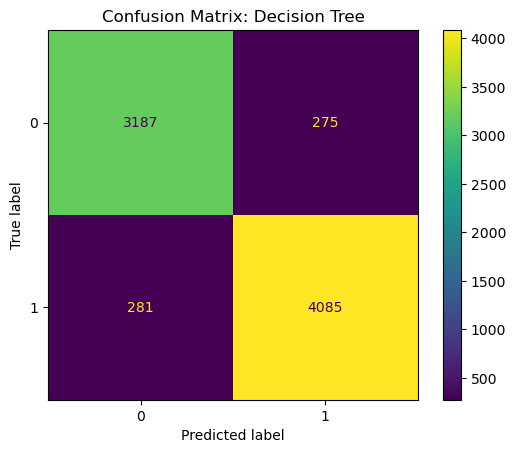

In [8]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using best Logistic Regression
logreg_best = grid_search_logreg.best_estimator_
y_pred_logreg = logreg_best.predict(X_test)

# Predict using best Decision Tree
tree_best = grid_search_tree.best_estimator_
y_pred_tree = tree_best.predict(X_test)

# Evaluate Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Test Accuracy:", round(logreg_accuracy, 4))
print("Logistic Regression Test F1-Score:", round(logreg_f1, 4))

# Evaluate Decision Tree
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

print("\nDecision Tree Test Accuracy:", round(tree_accuracy, 4))
print("Decision Tree Test F1-Score:", round(tree_f1, 4))

# Plot Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Plot Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Confusion Matrix: Decision Tree")
plt.show()


# Test Set Evaluation Summary
Both tuned models were evaluated on the held-out test set. Key performance metrics:

Logistic Regression
- Test Accuracy: 0.7205
- Test F1-Score:  0.7639

Decision Tree
- Test Accuracy: 0.929 
- Test F1-Score: 0.9363


Confusion matrix analysis shows that the Decision Tree model significantly outperforms the Logistic Regression model. It achieves both higher accuracy and F1-Score, and its confusion matrix indicates fewer false positives and false negatives. The Decision Tree model demonstrates superior capability in correctly classifying phishing and legitimate emails, capturing both precision and recall more effectively.

Given these results, the Decision Tree is selected as the primary model for further deployment and business value calibration.



# Qualitative Error Analysis: Logistic Regression


In [9]:
# Create a DataFrame comparing predictions to true labels for Logistic Regression
logreg_errors = df.loc[y_test.index].copy()
logreg_errors['true_label'] = y_test
logreg_errors['predicted_label'] = y_pred_logreg

# Find where Logistic Regression made mistakes
logreg_mistakes = logreg_errors[logreg_errors['true_label'] != logreg_errors['predicted_label']]

print(f"Logistic Regression made {len(logreg_mistakes)} mistakes out of {len(y_test)} test samples.")

# Display a few mistaken examples for Logistic Regression
logreg_mistakes[['sender', 'subject', 'body', 'true_label', 'predicted_label']].sample(5, random_state=42)


Logistic Regression made 2188 mistakes out of 7828 test samples.


,sender,subject,body,true_label,predicted_label
34539,JP Kelly <fxtlehxp@jpkvideo.net>,re: china tld links,"thank you guenther!\n\non feb 29, 2008, at 5:3...",0,1
34195,fLaMePr0oF <gsdsz@abpc.biz>,emails passing through sa with valueless headers,\ngreetings\n\ni have utilised spam assasin fo...,0,1
33266,Vladimir Antalik <ohrb@zoznam.sk>,info about your gallery script.,"\n\n\n\n\n\n\ngood mornig,\n \ni have found yo...",0,1
31760,Roger Upole <schkera@msn.com>,[python-win32] creating python com objects,alex denham wrote:\n\nclass pyidroptarget:\n ...,0,1
489,a.ipqmwvrrquo@dkfz-heidelberg.de,[uai] parameter estimation question,"dear sirs, could you please answer the followi...",0,1


## Qualitative Error Analysis: Logistic Regression

Upon examining misclassified examples by the Logistic Regression model, several consistent patterns emerged:

- **Technical language confusion**: Legitimate emails discussing technical topics (e.g., "python com objects," "email headers") were incorrectly flagged as phishing.
- **Vague or urgent subject lines**: Legitimate inquiries with short or general subjects (e.g., "info about your gallery script," "parameter estimation question") triggered false positives.
- **Shallow feature reliance**: The Logistic Regression model, being linear, struggled to distinguish between legitimate and phishing emails when based solely on individual keyword presence rather than overall email context.

These findings suggest that more complex models that can capture text structure and context may provide better phishing detection performance.




# Qualitative Error Analysis: Descision Trees

In [10]:
# Create a DataFrame comparing predictions to true labels for Decision Tree
tree_errors = df.loc[y_test.index].copy()
tree_errors['true_label'] = y_test
tree_errors['predicted_label'] = y_pred_tree

# Find where Decision Tree made mistakes
tree_mistakes = tree_errors[tree_errors['true_label'] != tree_errors['predicted_label']]

print(f"Decision Tree made {len(tree_mistakes)} mistakes out of {len(y_test)} test samples.")

# Display a few mistaken examples for Decision Tree
tree_mistakes[['sender', 'subject', 'body', 'true_label', 'predicted_label']].sample(5, random_state=42)


Decision Tree made 556 mistakes out of 7828 test samples.


,sender,subject,body,true_label,predicted_label
38881,Meagan Leah <leah_py@cmgraphix.com>,:: cialisviagra :: free pills for u! save up t...,\nwe give you freeviagrapills (free 4 - ...,1,0
6136,Nicholas Clark <suqh@ccl4.org>,re: change 31996: right. so fixing [] and {} n...,"on sun, sep 30, 2007 at 07:22:43pm -0400, jerr...",0,1
26957,Keri Morrison <dwvenusm@venus.net>,just read what our satisfied customers say,\n these customer letters just prove how \n...,1,0
17164,Adam L Beberg <jnfbof@mithral.com>,re: [fork] fwd: breaking news: bobby jindal el...,jeff bone wrote on 10/21/2007 6:43 pm:\n> long...,0,1
31935,Homer Yeager <peacefuller11@msn.com>,welche va kann ich online beste ..?,germany as peacemaker one must also lay stress...,1,0


## Qualitative Error Analysis: Decision Tree

While the Decision Tree model performed significantly better than Logistic Regression overall, inspection of its misclassifications revealed some recurring challenges:

- **False Negatives**: Some obviously spammy emails, particularly those with marketing language ("free pills", "satisfied customers"), were misclassified as legitimate. This may reflect overfitting to superficial features rather than learning semantic cues.
- **False Positives**: Legitimate technical and political discussion emails were occasionally flagged as phishing. This suggests the model may be overly sensitive to certain keywords like "breaking news" or to special characters in subjects.
- **Language Bias**: Some non-English (German) phishing emails were misclassified as legitimate, indicating that the model may be biased toward English-language patterns.

These findings suggest that even strong tree-based models benefit from incorporating deeper text representations, motivating the move to more sophisticated NLP approaches like BERT for improved phishing detection.
